In [11]:
import json
import csv
from PIL import Image, ImageDraw

In [18]:
f = open("/data/datasets/fr_shopping.json")
f2 = open("/data/datasets/openimages/train-annotations-bbox.csv")

In [19]:
reader = csv.reader(f2)

In [22]:
for i in reader:
    print(i)
    break

['000002b66c9c498e', 'xclick', '/m/01g317', '1', '0.012500', '0.195312', '0.148438', '0.587500', '0', '1', '0', '0', '0']


In [3]:
i = Image.open("/data/datasets/openimages/images/train/000002b66c9c498e.jpg")

In [8]:
i.height*0.148438

152.000512

In [7]:
i.width*0.012500
i.width*0.195312

199.999488

In [21]:
draw = ImageDraw.Draw(i)
x0 = i.width*0.012500
x1 = i.width*0.195312
y0 = i.height*0.148438
y1 = i.height*0.587500
draw.line((x0,y0, x0, y1), fill=128)
draw.line((x0,y1, x1, y1), fill=128)
draw.line((x1,y0, x1, y1), fill=128)
draw.line((x1,y0, x0, y0), fill=128)

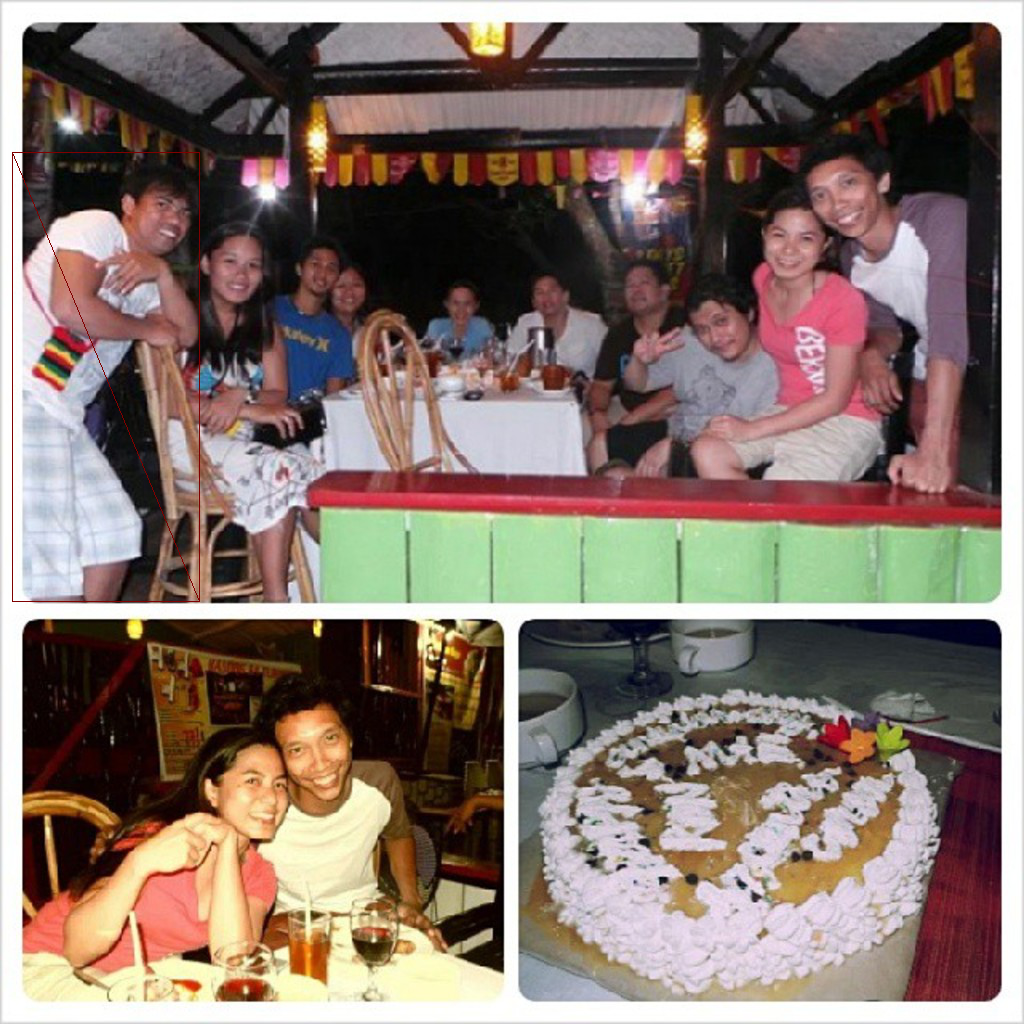

In [22]:
i

In [9]:
j = json.loads(line)

In [10]:
j['_source']['productType']

['DVD & Bluray', 'Comédie', 'DVD Comédie']

In [15]:
j['_source']['id']

'3459370406603'

In [4]:
def count_lines(f):
    f.seek(0)
    s = sum([1 for line in f])
    f.seek(0)
    return s

In [6]:
%%timeit
count_lines(f)

8.96 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
j

{'_index': 'shopping_fr_fr_21_09_2018',
 '_type': 'product',
 '_id': '830246f1a0b4108b549007870d2a72b56eed03b1',
 '_score': 1,
 '_source': {'color': [],
  'gender': None,
  'link': 'https://www.cultura.com/good-morning-vietnam-3459370406603.html?utm_source=qwant_fr&utm_medium=comparateur&utm_campaign=affiliation%23ae787',
  'pattern': None,
  'description': 'Un nouveau disc jockey est envoyé au Vietnam pour animer la radio des forces armées et distraire les soldats. Son ton frais et irrévérencieux le rend vitre populaire aux yeux des militaires.',
  'titleWordCount': 3,
  'availability': {'start': 0, 'end': 0, 'status': 'in stock'},
  'isDiscount': False,
  'title': 'GOOD MORNING VIETNAM',
  'itemGroupId': None,
  'productCategory': ['DVD & Bluray', 'Comédie', 'DVD Comédie'],
  'imageLink': 'https://media.cultura.com/media/catalog/product/g/o/good-morning-vietnam-3459370406603_0.jpg',
  'productCategoryPath': {'all': 'DVD & Bluray,Comédie,DVD Comédie',
   'first': 'DVD & Bluray',
   's